In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('results_micro.csv')
df.head()

,Unnamed: 0,model,type,accuracy,precision,recall,f1
0,0,7b_sft,none_conditioned,0.309533,0.309533,0.309533,0.309533
1,1,7b_sft,country_conditioned,0.308393,0.308393,0.308393,0.308393
2,2,7b_sft,value_conditioned,0.309533,0.309533,0.309533,0.309533
3,3,7b_sft,rot_conditioned,0.311052,0.311052,0.311052,0.311052
4,4,7b_sft_ppo,none_conditioned,0.331561,0.331561,0.331561,0.331561


In [4]:
models = df['model'].unique()

In [5]:
value_df = df[df['type'] == 'value_conditioned'].reset_index()

In [116]:
value_df

,index,Unnamed: 0,model,type,accuracy,precision,recall,f1
0,2,2,7b_sft,value_conditioned,0.309533,0.309533,0.309533,0.309533
1,6,6,7b_sft_ppo,value_conditioned,0.310672,0.310672,0.310672,0.310672
2,10,10,7b_sft_dpo,value_conditioned,0.390429,0.390429,0.390429,0.390429
3,14,14,7b_sft_kto,value_conditioned,0.397265,0.397265,0.397265,0.397265
4,18,18,13b_sft,value_conditioned,0.361565,0.361565,0.361565,0.361565
5,22,22,13b_sft_ppo,value_conditioned,0.308773,0.308773,0.308773,0.308773
6,26,26,13b_sft_dpo,value_conditioned,0.309913,0.309913,0.309913,0.309913
7,30,30,13b_sft_kto,value_conditioned,0.310292,0.310292,0.310292,0.310292
8,34,34,30b_sft,value_conditioned,0.410179,0.410179,0.410179,0.410179
9,38,38,30b_sft_ppo,value_conditioned,0.309533,0.309533,0.309533,0.309533


In [13]:
def map_model_name(model):
    if model.startswith('7b_sft'):
        return 'llama1-7b'
    elif model.startswith('13b_sft'):
        return 'llama1-13b'
    elif model.startswith('30b_sft'):
        return 'llama1-30b'
    else:
        return model

def to_exclude(model):
    if model.endswith('ppo') or model.endswith('kto') or model.endswith('dpo'):
        return True
    else:
        return False

value_df['grouped_model'] = value_df['model'].apply(map_model_name)
value_df['exclude'] = value_df['model'].apply(to_exclude)
order = [
   'llama1-7b', "llama1-13b", "llama1-30b", "llama2-7b-chat", "llama2-13b-chat",
    "llama2-70b-chat", "olmo-7b-sft", "olmo-7b-instruct", "mistral-chat",
    "gpt-3.5-turbo-0125", "gpt4"
]

# Filter out dpo, ppo etc.
# Only taking sft
value_df = value_df[value_df['exclude'] == False ]

# Apply the mapping function to the 'model' column
value_df['grouped_model'] = pd.Categorical(value_df['grouped_model'], categories=order, ordered=True)

# Group by the new 'grouped_model' column and calculate mean and standard deviation
grouped_stats = value_df.groupby('grouped_model')['accuracy'].agg(['mean', 'std']).reset_index()
grouped_stats['std'].fillna(0, inplace=True)
grouped_stats['grouped_model'] = grouped_stats['grouped_model'].replace('gpt4', 'gpt-4').replace('gpt-3.5-turbo-0125', 'gpt-3.5-turbo').replace('mistral-chat', 'mistral-instruct').replace("llama1-7b", "llama1-7b-sft").replace("llama1-13b", "llama1-13b-sft").replace("llama1-30b", "llama1-30b-sft")

# Convert the data to a DataFrame
grouped_stats_df_value = pd.DataFrame(grouped_stats)

In [14]:
grouped_stats_df_value

,grouped_model,mean,std
0,llama1-7b-sft,0.309533,0.0
1,llama1-13b-sft,0.361565,0.0
2,llama1-30b-sft,0.410179,0.0
3,llama2-7b-chat,0.412457,0.0
4,llama2-13b-chat,0.592860,0.0
5,llama2-70b-chat,0.605013,0.0
6,olmo-7b-sft,0.539309,0.0
7,olmo-7b-instruct,0.515761,0.0
8,mistral-instruct,0.598177,0.0
9,gpt-3.5-turbo,0.611521,0.0


In [15]:

from matplotlib.colors import to_rgba, to_hex
base_colors = {
    'llama1': '#ff3300',    # Red
    'llama2': '#FFA500',     # Orange
    'olmo': '#008000',       # Dark green
    'mistral': '#008080',    # Teal
    'gpt': '#800049'         # Purple
}


def adjust_color_lightness(color, amount=0.5):
    """
    Adjusts a color's brightness.
    amount > 1.0 makes the color lighter, amount < 1.0 makes it darker.
    """
    try:
        c = to_rgba(color)
        c = (c[0] * amount, c[1] * amount, c[2] * amount, c[3])
        return to_hex(c)
    except Exception as e:
        print(f"Error adjusting color brightness: {e}")
        return color

def get_model_base(name):
    """
    Extracts the base model name and adjusts for variations if necessary.
    """
    return name.split('-')[0]

# Assign colors to each model, adjusting for specific variations
# grouped_stats_df_value['color'] = grouped_stats_df_value['grouped_model'].apply(lambda x: get_model_base(x))
grouped_stats_df_value['color'] = grouped_stats_df_value['grouped_model'].apply(lambda x: adjust_color_lightness(base_colors[get_model_base(x)],
                                            0.8 if '30' in x or '70' in x or 'olmo-7b-instruct' in x else (0.9 if '13' in x or 'olmo-7b-instruct' in x else 1.0)))

KeyError: 'llama1'

In [120]:
grouped_stats_df_value

,grouped_model,mean,std,color
0,llama1-7b,0.309533,0.0,#cc0000
1,llama1-13b,0.361565,0.0,#cc0000
2,llama1-30b,0.410179,0.0,#cc0000
3,llama2-7b-chat,0.412457,0.0,#cc8400
4,llama2-13b-chat,0.592860,0.0,#cc8400
5,llama2-70b-chat,0.605013,0.0,#cc8400
6,olmo-7b-sft,0.539309,0.0,#006600
7,olmo-7b-instruct,0.515761,0.0,#006600
8,mistral-instruct,0.598177,0.0,#006666
9,gpt-3.5-turbo,0.611521,0.0,#660066


In [121]:
value_df = df[df['type'] == 'rot_conditioned'].reset_index()

def map_model_name(model):
    if model.startswith('7b_sft'):
        return 'llama1-7b'
    elif model.startswith('13b_sft'):
        return 'llama1-13b'
    elif model.startswith('30b_sft'):
        return 'llama1-30b'
    else:
        return model

def to_exclude(model):
    if model.endswith('ppo') or model.endswith('kto') or model.endswith('dpo'):
        return True
    else:
        return False

value_df['grouped_model'] = value_df['model'].apply(map_model_name)
value_df['exclude'] = value_df['model'].apply(to_exclude)
order = [
   'llama1-7b', "llama1-13b", "llama1-30b", "llama2-7b-chat", "llama2-13b-chat",
    "llama2-70b-chat", "olmo-7b-sft", "olmo-7b-instruct", "mistral-chat",
    "gpt-3.5-turbo-0125", "gpt4"
]

# Filter out dpo, ppo etc.
# Only taking sft
value_df = value_df[value_df['exclude'] == False ]

# Apply the mapping function to the 'model' column
value_df['grouped_model'] = pd.Categorical(value_df['grouped_model'], categories=order, ordered=True)

# Group by the new 'grouped_model' column and calculate mean and standard deviation
grouped_stats = value_df.groupby('grouped_model')['accuracy'].agg(['mean', 'std']).reset_index()
grouped_stats['std'].fillna(0, inplace=True)
grouped_stats['grouped_model'] = grouped_stats['grouped_model'].replace('gpt4', 'gpt-4').replace('gpt-3.5-turbo-0125', 'gpt-3.5-turbo').replace('mistral-chat', 'mistral-instruct')

# Convert the data to a DataFrame
grouped_stats_df_rot = pd.DataFrame(grouped_stats)

In [122]:
grouped_stats_df_rot

,grouped_model,mean,std
0,llama1-7b,0.311052,0.0
1,llama1-13b,0.320547,0.0
2,llama1-30b,0.375997,0.0
3,llama2-7b-chat,0.478921,0.0
4,llama2-13b-chat,0.709837,0.0
5,llama2-70b-chat,0.713635,0.0
6,olmo-7b-sft,0.752754,0.0
7,olmo-7b-instruct,0.635017,0.0
8,mistral-instruct,0.818458,0.0
9,gpt-3.5-turbo,0.686854,0.0


In [123]:

from matplotlib.colors import to_rgba, to_hex
base_colors = {
    'llama1': '#FF0000',    # Red
    'llama2': '#FFA500',     # Orange
    'olmo': '#008000',       # Dark green
    'mistral': '#008080',    # Teal
    'gpt': '#800080'         # Purple
}


def adjust_color_lightness(color, amount=0.5):
    """
    Adjusts a color's brightness.
    amount > 1.0 makes the color lighter, amount < 1.0 makes it darker.
    """
    try:
        c = to_rgba(color)
        c = (c[0] * amount, c[1] * amount, c[2] * amount, c[3])
        return to_hex(c)
    except Exception as e:
        print(f"Error adjusting color brightness: {e}")
        return color

def get_model_base(name):
    """
    Extracts the base model name and adjusts for variations if necessary.
    """
    return name.split('-')[0]

# Assign colors to each model, adjusting for specific variations
# grouped_stats_df_value['color'] = grouped_stats_df_value['grouped_model'].apply(lambda x: get_model_base(x))
grouped_stats_df_rot['color'] = grouped_stats_df_rot['grouped_model'].apply(lambda x: adjust_color_lightness(base_colors[get_model_base(x)],0.8))

In [124]:
value_df = df[df['type'] == 'country_conditioned'].reset_index()

def map_model_name(model):
    if model.startswith('7b_sft'):
        return 'llama1-7b'
    elif model.startswith('13b_sft'):
        return 'llama1-13b'
    elif model.startswith('30b_sft'):
        return 'llama1-30b'
    else:
        return model

def to_exclude(model):
    if model.endswith('ppo') or model.endswith('kto') or model.endswith('dpo'):
        return True
    else:
        return False

value_df['grouped_model'] = value_df['model'].apply(map_model_name)
value_df['exclude'] = value_df['model'].apply(to_exclude)
order = [
   'llama1-7b', "llama1-13b", "llama1-30b", "llama2-7b-chat", "llama2-13b-chat",
    "llama2-70b-chat", "olmo-7b-sft", "olmo-7b-instruct", "mistral-chat",
    "gpt-3.5-turbo-0125", "gpt4"
]

# Filter out dpo, ppo etc.
# Only taking sft
value_df = value_df[value_df['exclude'] == False ]

# Apply the mapping function to the 'model' column
value_df['grouped_model'] = pd.Categorical(value_df['grouped_model'], categories=order, ordered=True)

# Group by the new 'grouped_model' column and calculate mean and standard deviation
grouped_stats = value_df.groupby('grouped_model')['accuracy'].agg(['mean', 'std']).reset_index()
grouped_stats['std'].fillna(0, inplace=True)
grouped_stats['grouped_model'] = grouped_stats['grouped_model'].replace('gpt4', 'gpt-4').replace('gpt-3.5-turbo-0125', 'gpt-3.5-turbo').replace('mistral-chat', 'mistral-instruct')

# Convert the data to a DataFrame
grouped_stats_df_country = pd.DataFrame(grouped_stats)

In [125]:

from matplotlib.colors import to_rgba, to_hex
base_colors = {
    'llama1': '#FF0000',    # Red
    'llama2': '#FFA500',     # Orange
    'olmo': '#008000',       # Dark green
    'mistral': '#008080',    # Teal
    'gpt': '#800080'         # Purple
}


def adjust_color_lightness(color, amount=0.5):
    """
    Adjusts a color's brightness.
    amount > 1.0 makes the color lighter, amount < 1.0 makes it darker.
    """
    try:
        c = to_rgba(color)
        c = (c[0] * amount, c[1] * amount, c[2] * amount, c[3])
        return to_hex(c)
    except Exception as e:
        print(f"Error adjusting color brightness: {e}")
        return color

def get_model_base(name):
    """
    Extracts the base model name and adjusts for variations if necessary.
    """
    return name.split('-')[0]

# Assign colors to each model, adjusting for specific variations
# grouped_stats_df_value['color'] = grouped_stats_df_value['grouped_model'].apply(lambda x: get_model_base(x))
grouped_stats_df_country['color'] = grouped_stats_df_country['grouped_model'].apply(lambda x: adjust_color_lightness(base_colors[get_model_base(x)],0.8))

In [126]:
grouped_stats_df_country

,grouped_model,mean,std,color
0,llama1-7b,0.308393,0.0,#cc0000
1,llama1-13b,0.355108,0.0,#cc0000
2,llama1-30b,0.309533,0.0,#cc0000
3,llama2-7b-chat,0.489935,0.0,#cc8400
4,llama2-13b-chat,0.532093,0.0,#cc8400
5,llama2-70b-chat,0.313331,0.0,#cc8400
6,olmo-7b-sft,0.477782,0.0,#006600
7,olmo-7b-instruct,0.468287,0.0,#006600
8,mistral-instruct,0.556779,0.0,#006666
9,gpt-3.5-turbo,0.550222,0.0,#660066


<ipython-input-127-48d4ee173901>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(grouped_stats_df_rot['grouped_model'], rotation=30)
<ipython-input-127-48d4ee173901>:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(grouped_stats_df_value['grouped_model'], rotation=30)
<ipython-input-127-48d4ee173901>:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(grouped_stats_df_country['grouped_model'], rotation=30)


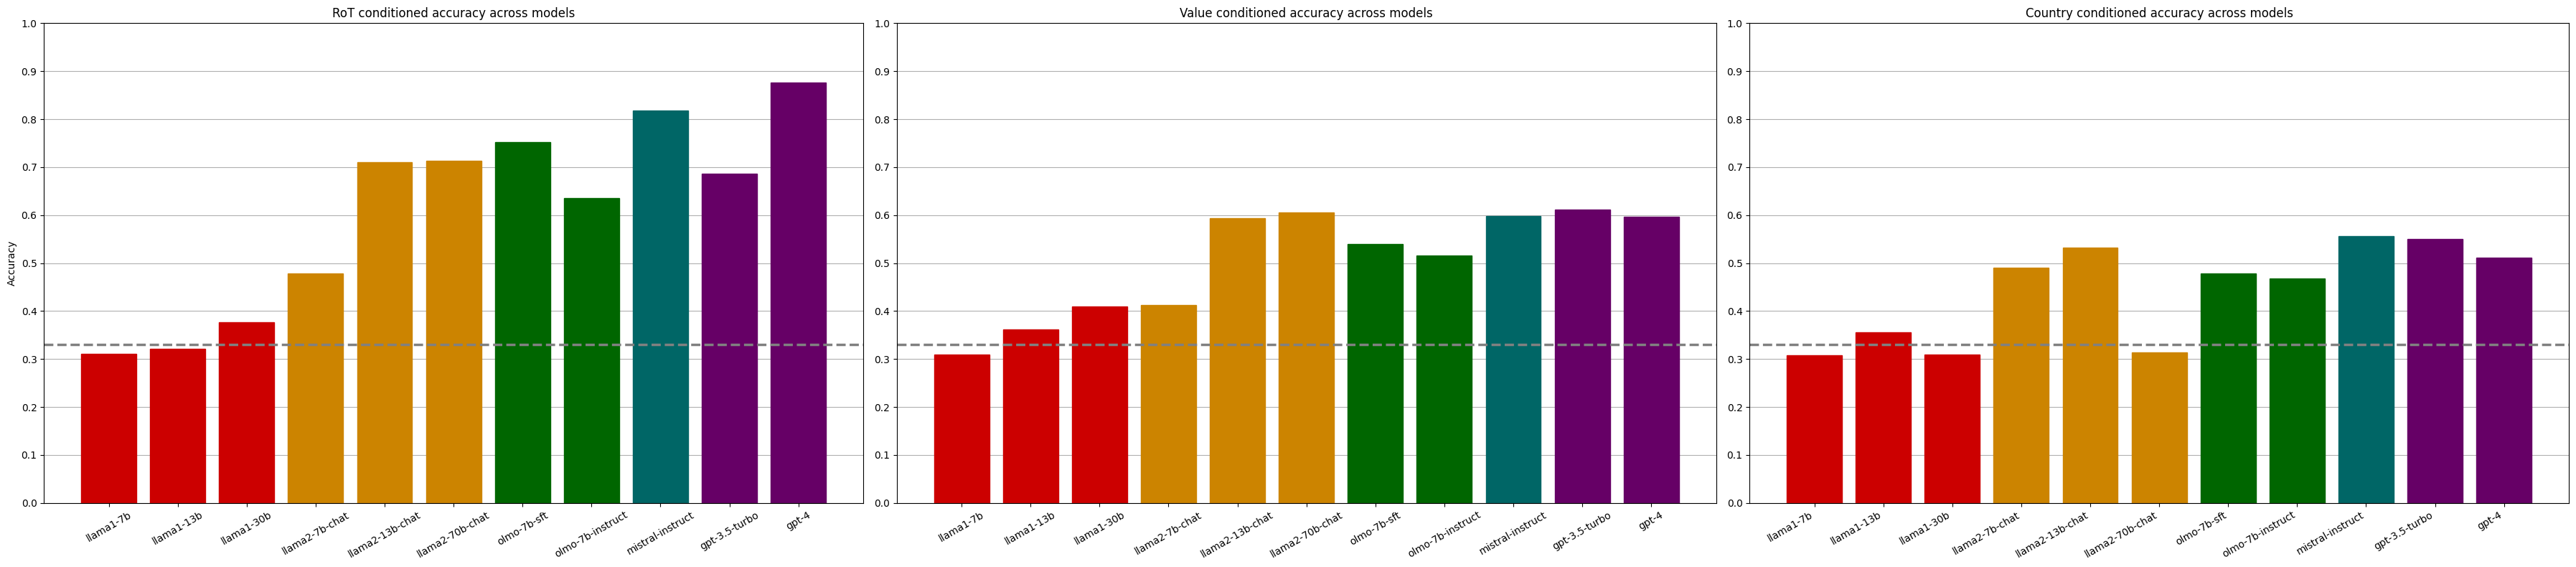

In [127]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
# Define base colors for different groups
base_colors = {
    'llama1': '#FF0000',  # Red
    'llama2': '#FFA500',   # Orange
    'olmo': '#008000',     # Dark green
    'mistral': '#008080',  # Teal
    'gpt': '#800080'       # Purple
}

# Create a figure and axis
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(36, 8))

# Plot bars with error bars
bars = ax1.bar(grouped_stats_df_rot['grouped_model'],grouped_stats_df_rot['mean'])
# bars = ax1.bar(grouped_stats_df_rot['grouped_model'], grouped_stats_df_rot['mean'],
#               yerr=grouped_stats_df_rot['std'].fillna(0).astype(float))

# Set colors for each bar based on the group
for i, model in enumerate(grouped_stats_df_rot['grouped_model']):
    base_model = model.split('-')[0] # split by '-' and take the first part
    # Calculate color variant based on index and create a color gradient
    # color = mcolors.LinearSegmentedColormap.from_list(
    #     "grad", [mcolors.ColorConverter().to_rgba(base_colors[base_model], alpha=0.2),
    #              mcolors.ColorConverter().to_rgba(base_colors[base_model], alpha=1)], N=len(grouped_stats_df_value))(i)
    color = grouped_stats_df_rot.iloc[i]['color']
    bars[i].set_color(color)

# Set labels and title
ax1.set_ylabel('Accuracy')
ax1.set_title('RoT conditioned accuracy across models')

# Add color legend
for group, color in base_colors.items():
    ax1.bar(0, 0, color=color, label=group)


# Rotate x-axis labels for better readability
ax1.set_xticklabels(grouped_stats_df_rot['grouped_model'], rotation=30)
ax1.yaxis.grid(True)
ax1.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax1.set_ylim([0,1])
# send the grid to back
ax1.set_axisbelow(True)

#####
# Plot bars with error bars
bars = ax2.bar(grouped_stats_df_value['grouped_model'],grouped_stats_df_value['mean'])

# Set colors for each bar based on the group
for i, model in enumerate(grouped_stats_df_value['grouped_model']):
    base_model = model.split('-')[0] # split by '-' and take the first part
    # Calculate color variant based on index and create a color gradient
    # color = mcolors.LinearSegmentedColormap.from_list(
    #     "grad", [mcolors.ColorConverter().to_rgba(base_colors[base_model], alpha=0.2),
    #              mcolors.ColorConverter().to_rgba(base_colors[base_model], alpha=1)], N=len(grouped_stats_df_value))(i)
    color = grouped_stats_df_value.iloc[i]['color']
    bars[i].set_color(color)

# Set labels and title
# ax2.set_ylabel('Accuracy')
ax2.set_title('Value conditioned accuracy across models')

# Add color legend
for group, color in base_colors.items():
    ax2.bar(0, 0, color=color, label=group)

# Rotate x-axis labels for better readability
ax2.set_xticklabels(grouped_stats_df_value['grouped_model'], rotation=30)
ax2.yaxis.grid(True)
ax2.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax2.set_ylim([0,1])
# send the grid to back
ax2.set_axisbelow(True)
#####

#####
# Plot bars with error bars
bars = ax3.bar(grouped_stats_df_country['grouped_model'],grouped_stats_df_country['mean'])

# Set colors for each bar based on the group
for i, model in enumerate(grouped_stats_df_country['grouped_model']):
    base_model = model.split('-')[0] # split by '-' and take the first part
    # Calculate color variant based on index and create a color gradient
    # color = mcolors.LinearSegmentedColormap.from_list(
    #     "grad", [mcolors.ColorConverter().to_rgba(base_colors[base_model], alpha=0.2),
    #              mcolors.ColorConverter().to_rgba(base_colors[base_model], alpha=1)], N=len(grouped_stats_df_country))(i)
    color = grouped_stats_df_country.iloc[i]['color']
    bars[i].set_color(color)

# Set labels and title
ax3.set_xticklabels(grouped_stats_df_country['grouped_model'], rotation=30)
# ax3.set_ylabel('Accuracy')
ax3.set_title('Country conditioned accuracy across models')

# Add color legend
for group, color in base_colors.items():
    ax3.bar(0, 0, color=color, label=group)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

ax3.yaxis.grid(True)
ax3.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax3.set_ylim([0,1])
# send the grid to back
ax3.set_axisbelow(True)
#####

# plt.ylim([0, 1])
ax1.axhline(y=0.33, color='grey', linestyle='--', linewidth=2.5, label='baseline reference')
ax2.axhline(y=0.33, color='grey', linestyle='--', linewidth=2.5, label='baseline reference')
ax3.axhline(y=0.33, color='grey', linestyle='--', linewidth=2.5, label='baseline reference')
# Show plot
plt.tight_layout()
plt.savefig("all_conditioned_colored.pdf", bbox_inches="tight")
plt.show()